## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [9]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [10]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [11]:
column_names = ['DATE', 'TAG', 'POSTS']
df = pd.read_csv('QueryResults.csv', header=0, names=column_names)
print(df)

                     DATE         TAG  POSTS
0     2008-07-01 00:00:00          c#      3
1     2008-08-01 00:00:00    assembly      8
2     2008-08-01 00:00:00  javascript    162
3     2008-08-01 00:00:00           c     85
4     2008-08-01 00:00:00      python    124
...                   ...         ...    ...
1986  2020-07-01 00:00:00           r   5694
1987  2020-07-01 00:00:00          go    743
1988  2020-07-01 00:00:00        ruby    775
1989  2020-07-01 00:00:00        perl    182
1990  2020-07-01 00:00:00       swift   3607

[1991 rows x 3 columns]


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [12]:
row, col = df.shape
print(row)
print(col)

1991
3


**Challenge**: Count the number of entries in each column of the dataframe

In [13]:
df.count()

,0
DATE,1991
TAG,1991
POSTS,1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [14]:
df.groupby(['TAG']).sum()


,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [15]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [16]:
df['DATE'][1]
type(df['DATE'][1])

str

In [17]:
df.DATE[1]

'2008-08-01 00:00:00'

In [18]:
# print(pd.to_datetime(df.DATE[1]))
# type(pd.to_datetime(df['DATE'][1]))

# Convert entire 'DATE' column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


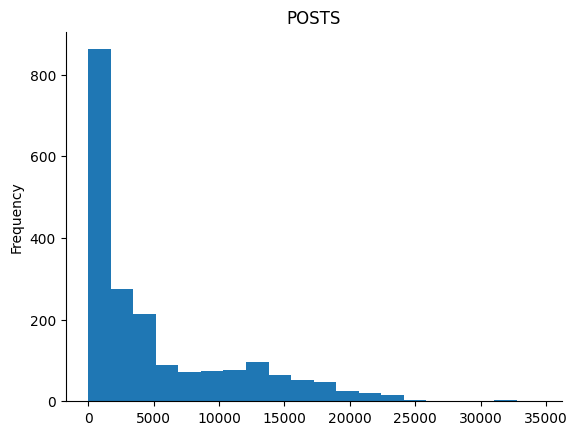

In [19]:
# @title POSTS

from matplotlib import pyplot as plt
df['POSTS'].plot(kind='hist', bins=20, title='POSTS')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data Manipulation



In [20]:
# test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
#                         'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
#                         'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
# # test_df

# pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
# pivoted_df


# Challenge 1: Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

# Challenge 2: Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?
reshaped_df.shape

# Challenge 3: Examine the head and the tail of the DataFrame. What does it look like?
reshaped_df.head()
reshaped_df.tail()

# Challenge 4: Print out the column names.
# reshaped_df.head(0)
reshaped_df.columns

# Challenge 5: Count the number of entries per column.
reshaped_df[['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']].count()

,0
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [21]:
# What are the dimensions of our new dataframe?
# How many rows and columns does it have?
reshaped_df.shape

(145, 14)

In [22]:
# Print out the column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [23]:
# print out the first 5 rows of the dataframe.
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [24]:
# reshaped_df[['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift']].count()
reshaped_df.count()

,0
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [25]:
# Dealing with NaN Values
# In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [26]:
# The inplace argument means that we are updating reshaped_df. Without this argument we would have to write something like this:
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

# We can also check if there are any NaN values left in the entire DataFrame with this line:
reshaped_df.isna().values.any()

# Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method.
# This means we don't have to search through the entire DataFrame to spot if .isna() is True.

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

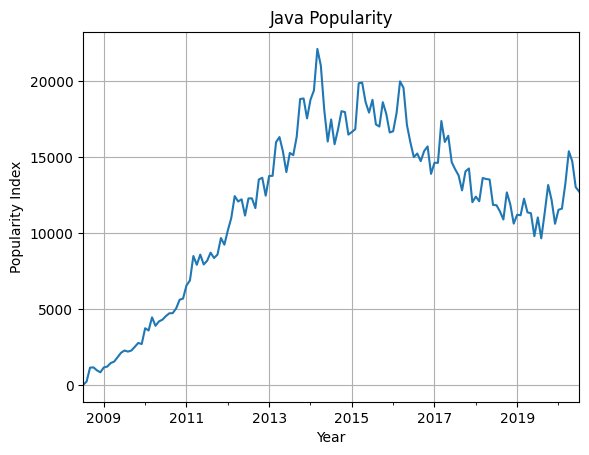

In [27]:
# SOLUTION 1ST:

import matplotlib.pyplot as plt

data = reshaped_df['java']

java_popularity = pd.Series(data, name='Popularity of Java Programming Language')
java_popularity.plot(kind='line', title='Java Popularity')
plt.ylabel('Popularity Index')
plt.xlabel('Year')
plt.grid('True')
plt.show()

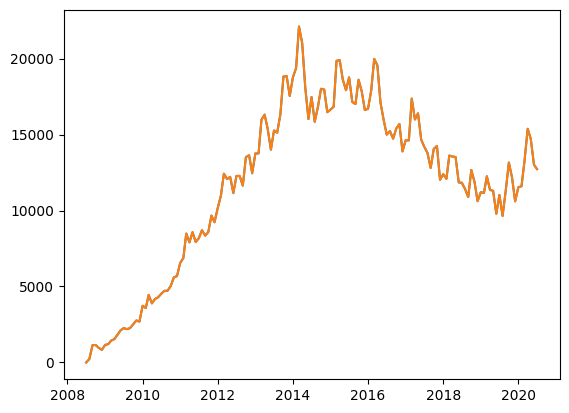

In [38]:
# SOLUTION 2nd:
# All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart.
# The x-values are our dates and the y-values are the number of posts. We can supply these values to the .plot() function by position like so:
plt.plot(reshaped_df.index, reshaped_df.java)
# OR
plt.plot(reshaped_df.index, reshaped_df['java'])

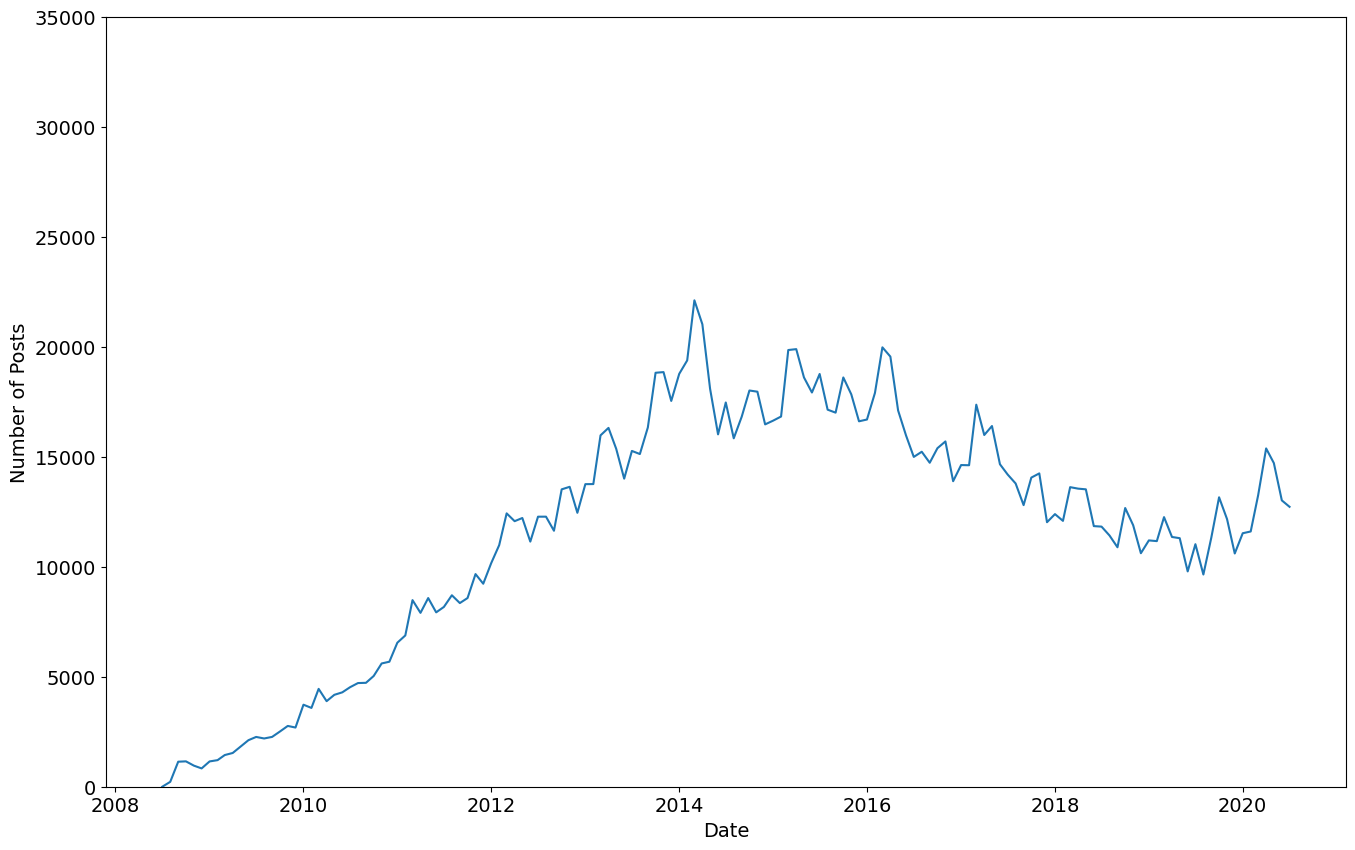

In [39]:
# To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

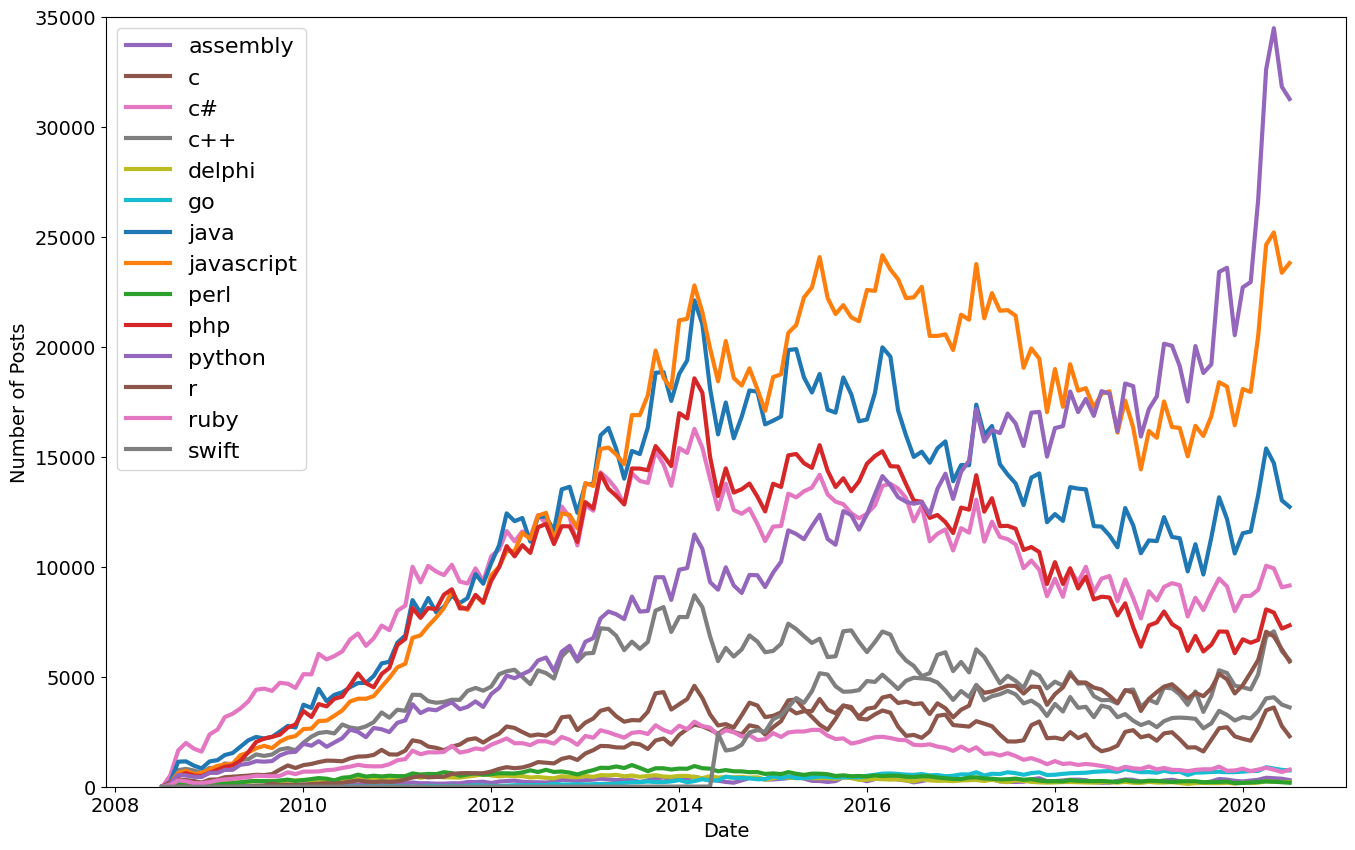

In [46]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])

# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.python)


# Ploting all the languages using for loop
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])


# But wait, which language is which?
# Ploting all the languages using for loop with indicator
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [47]:
# the window is number of observation that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

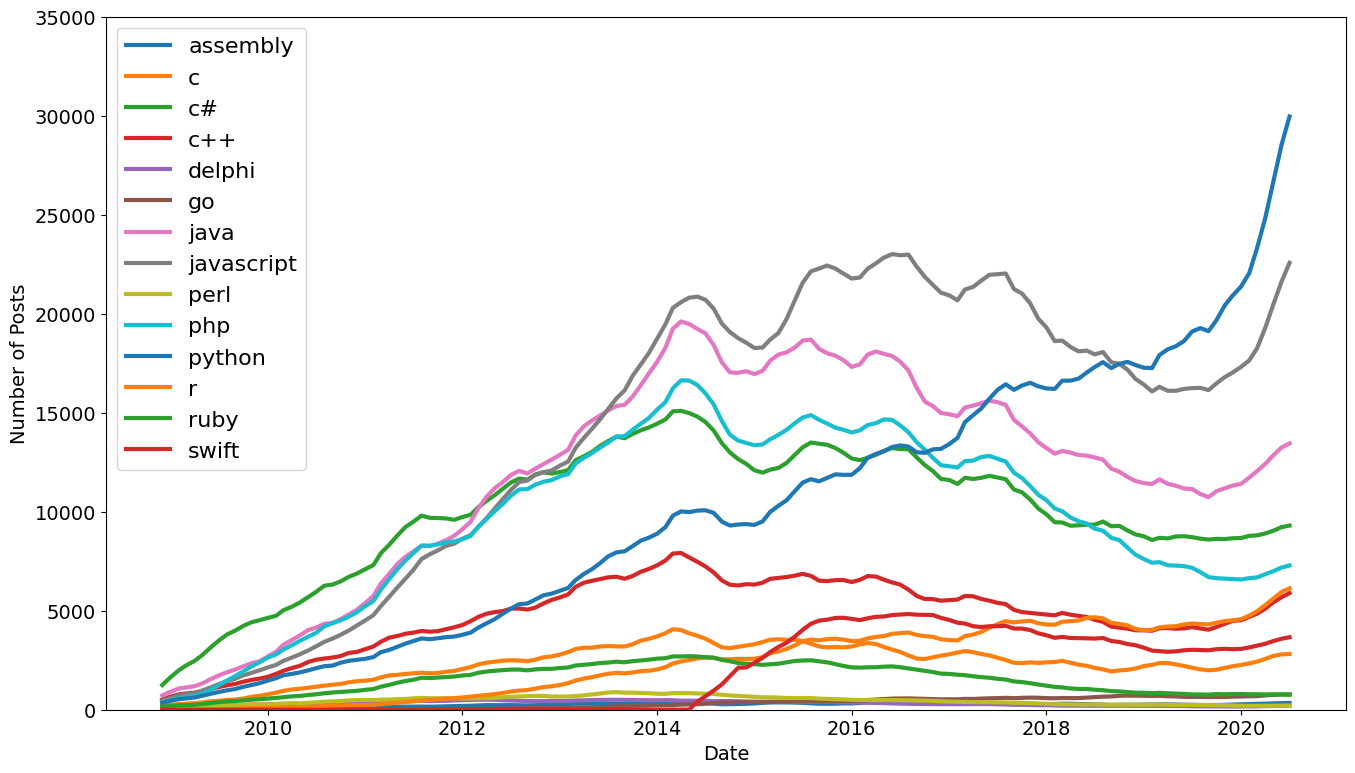

In [51]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead of reshaped_df
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)